In [1]:
import numpy as np
import pandas as pd
from ESNmodel import SingleNodeDelayESN, ESNPipeline
from ESNplots import internalStatesHistogram, predictionAnalysis

In [2]:
from reservoirpy.datasets import mackey_glass
timeseries = mackey_glass(15000)

In [3]:
N_VIRTUAL_NODES = 347
TAU = 80
THETA = TAU / N_VIRTUAL_NODES
INTEGRATION_STEP = 0.1
ETA = 0.5
GAMMA = 0.1
MASK_SCALING = 0.1
RIDGE_PARAM = 0.25
ACTIVATION = np.tanh
FEEDBACK = False
STATE_NOISE = 0.0
RANDOM_SEED = 42

esn_delay_params = {
    'inputSize': 1,
    'numVirtualNodes': N_VIRTUAL_NODES,
    'outputSize': 1,
    'tau': TAU,
    'theta': THETA,
    'eta': ETA,
    'gamma': GAMMA,
    'maskScaling': MASK_SCALING,
    'integrationStep': INTEGRATION_STEP,
    'ridgeParam': RIDGE_PARAM,
    'activation': ACTIVATION,
    'feedback': FEEDBACK,
    'stateNoise': STATE_NOISE,
    'randomSeed': RANDOM_SEED
}

In [4]:
pipeline = ESNPipeline(esn_params=esn_delay_params)

In [5]:
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=100,
    washout_pred=0,
)

In [6]:
print(pd.DataFrame([metrics]))

        mse      rmse       mae     nrmse
0  0.001001  0.031634  0.027324  0.035154


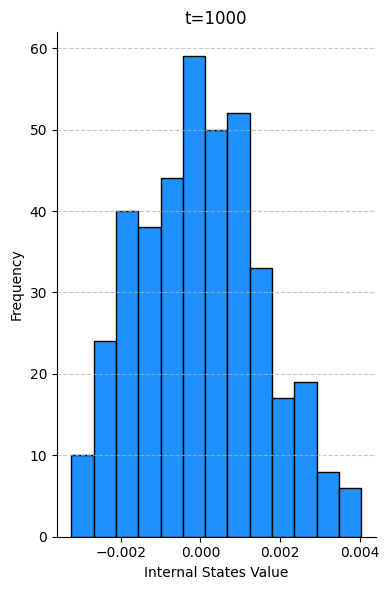

In [8]:
step_k_to_plot = 1000
if internal_states is not None and internal_states.shape[1] > step_k_to_plot :
    internalStatesHistogram(
        states=internal_states,
        time_step_index=step_k_to_plot,
        reservoir_size=esn_delay_params['numVirtualNodes'],
    )

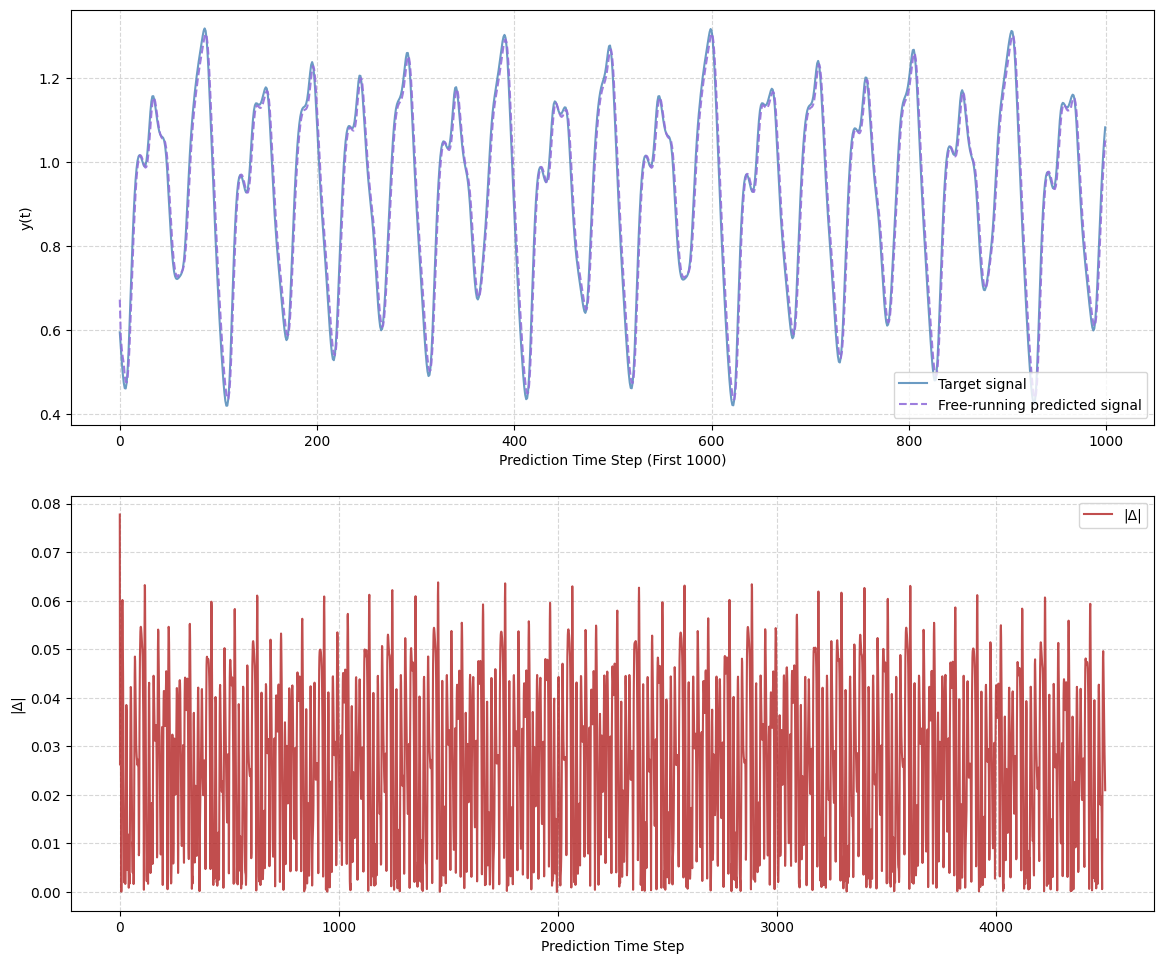

In [9]:
predictionAnalysis(
    predictions=predictions,
    actuals=actuals,
    zoom_limit=1000
)